In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [4]:
df_locales = pd.read_csv("../Data/locales-bailables.csv", encoding='latin1')
#df_locales.loc[:4, ['X', 'Y','NOMBRE','CALLE','NUMERO']]

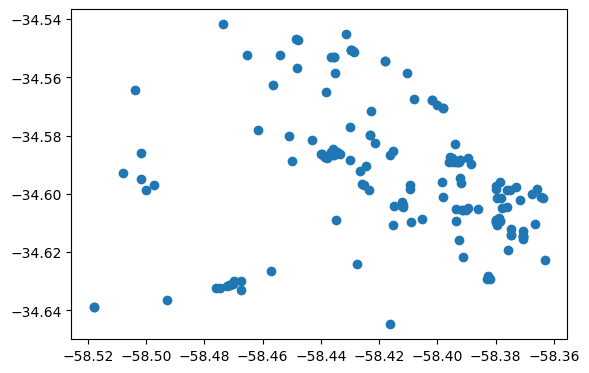

In [7]:
geo_locales = gpd.GeoDataFrame(df_locales
                             ,geometry=gpd.points_from_xy(df_locales.X, df_locales.Y))


geo_locales.plot()

In [12]:
barrios = pd.read_csv("../Data/barrios.csv", encoding='latin1')
barrios.head()

#si usaba gpd.read_file me ahorraba transformar el dato de wkt en poligono

#barrios.plot()
#grafica mal porque ninguna es geo, tipo data set comun


,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [14]:
import shapely.wkt
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')
type(geo_barrios)
#geo_barrios.head()

TypeError: Only str is accepted.

In [15]:
geo_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",ALMAGRO,5.0,8537.901368,4.050752e+06


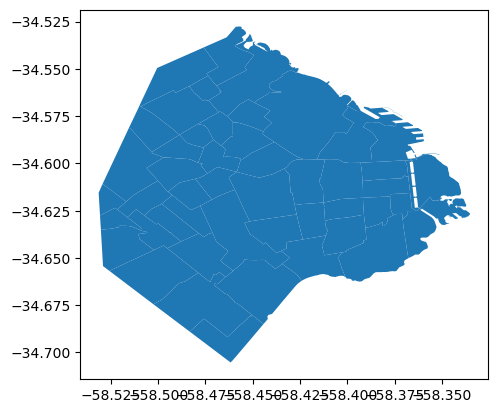

In [11]:
geo_barrios.plot()

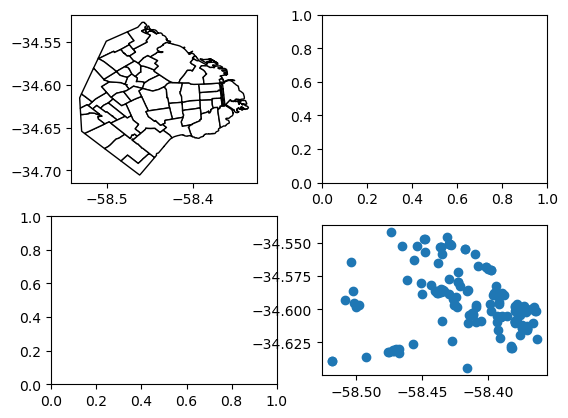

In [20]:
#armame figura y ejes
fig, ax = plt.subplots(2,2)
#ejes con la misma escala
#ax.set_aspect('equal')
#dibuja geo barrios usando esos ejes, color blanco y borde negro
geo_barrios.plot(ax=ax[0,0], color='white', edgecolor='black')
#dibujo los locales en el mismo eje que barrios
geo_locales.plot(ax=ax[1,1])
#linea_a_geo.plot(ax=ax, color='red')
plt.show();

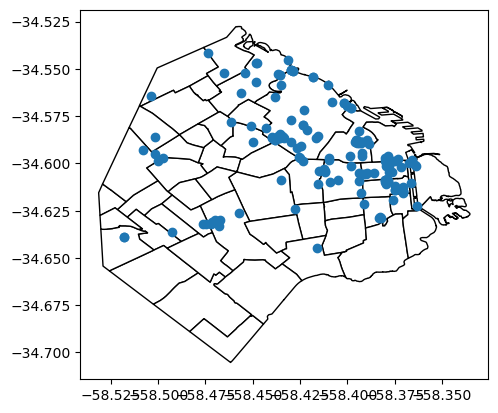

In [23]:
#armame figura y ejes
fig, ax = plt.subplots()
#ejes con la misma escala
ax.set_aspect('equal')
#dibuja geo barrios usando esos ejes, color blanco y borde negro
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
#dibujo los locales en el mismo eje que barrios
geo_locales.plot(ax=ax)
#linea_a_geo.plot(ax=ax, color='red')
plt.show();

In [24]:
from shapely.geometry import Point
punto_dh = Point( -58.443555,-34.548921) # dato geoespacial de DH.
punto_afrika = Point( -58.39239, -34.58843) # dato geoespacial de Afrika
punto_dh.type

'Point'

In [25]:
from shapely.geometry import LineString
linea_a = LineString([punto_dh, punto_afrika])
linea_a.type

'LineString'

In [26]:
linea_a_geo = gpd.GeoSeries([punto_dh, punto_afrika, linea_a])
#geo serie y no geo data fram porque es una sola columna

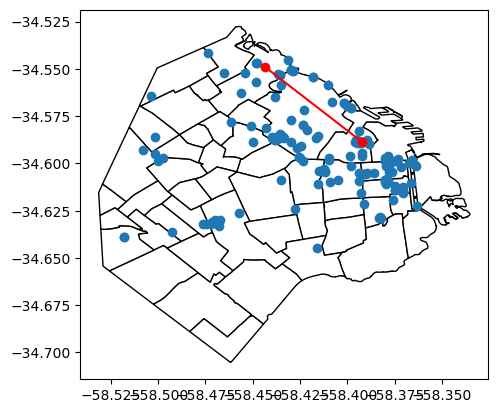

In [28]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_locales.plot(ax=ax)
linea_a_geo.plot(ax=ax, color='red')
plt.show();

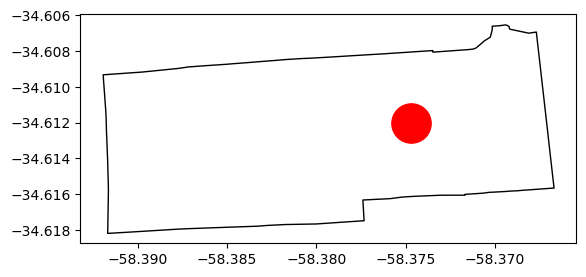

In [36]:
geo_monserrat = geo_barrios.loc[geo_barrios["BARRIO"]=="MONSERRAT"]
geo_rey_castro = geo_locales[geo_locales['NOMBRE']=='REY CASTRO'] 

fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_monserrat.plot(ax=ax, color='white', edgecolor='black')
geo_rey_castro.plot(ax=ax, color='red', marker='o', markersize = 800)
plt.show();


In [41]:
punto_rey_castro = Point(geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].X,
                         geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].Y)


#al pedo cree un punto si ya tenia un punto en el geomtry de rey_castro
punto_rey=geo_rey_castro['geometry'].iloc[0]
type(punto_rey)

shapely.geometry.point.Point

In [45]:
geo_monserrat.contains(punto_rey_castro)



#geo_barrios.contains(punto_rey_castro)

41    True
dtype: bool

In [46]:
geo_barrios.crosses(linea_a).tail()

43     True
44     True
45    False
46    False
47    False
dtype: bool

In [49]:
geo_barrios.loc[geo_barrios.crosses(linea_a), 'BARRIO']


33     PALERMO
43    BELGRANO
44    RECOLETA
Name: BARRIO, dtype: object

In [50]:
options = ['PALERMO','BELGRANO','RECOLETA'] 
geo_barrios_recorrida = geo_barrios[geo_barrios['BARRIO'].isin(options)] 
geo_barrios_recorrida

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
33,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",PALERMO,14.0,21768.074886,1.577250e+07
43,"POLYGON ((-58.45159 -34.53153, -58.45152 -34.5...",BELGRANO,13.0,21504.197774,7.932303e+06
44,"POLYGON ((-58.39521 -34.57219, -58.39482 -34.5...",RECOLETA,2.0,21246.611702,6.140873e+06


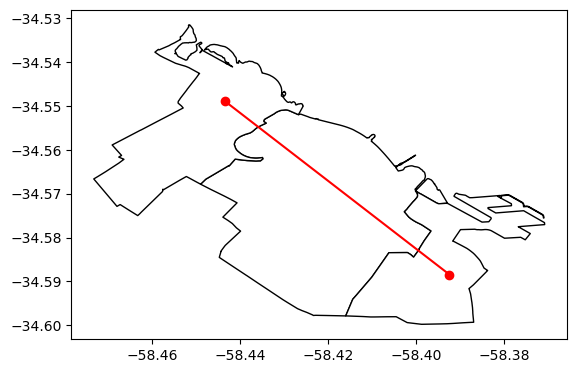

In [51]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios_recorrida.plot(ax=ax, color='white', edgecolor='black')
linea_a_geo.plot(ax=ax, color='red')
plt.show();

In [52]:
punto_dh_t = ( -58.443555,-34.548921) # dato geoespacial de DH
punto_afrika_t = ( -58.39239, -34.58843) # dato geoespacial de Afrika

In [53]:
type(punto_dh_t)

tuple

In [56]:
import geopy
import geopy.distance as distance
dist = geopy.distance.geodesic(punto_dh_t,punto_afrika_t)
dist.meters

print(dist)
type(dist)


6.149000030999573 km


geopy.distance.geodesic

In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj

In [ ]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Bogota','Cali', 'Medellin', 'Barranquilla'],
     'Latitud': [4.60971, 3.43722, 6.25184, 10.96854],
     'Longitud': [-74.08175, -76.5225, -75.56359, -74.78132]})